![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [2]:
# load the Images from images.npy file
import numpy as np
data = np.load('/content/drive/MyDrive/Colab Notebooks/Project-ACV/Dataset/images.npy', allow_pickle = True)
data.shape

(409, 2)

### Check one sample from the loaded "images.npy" file  (2 marks)
- Hint: print data[10][1] 

In [3]:
print(data[10][0]) # Image
print(data[10][1]) # Label
print(data[10][0].shape) # Original Image size

[[[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [5 5 5]
  [6 6 6]
  [6 6 6]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [5 5 5]
  [6 6 6]
  [6 6 6]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [5 5 5]
  [5 5 5]
  [5 5 5]]]
[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]
(337, 600, 3)


### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [4]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [5]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [6]:
X.shape # Images resized to 224,224,3

(409, 224, 224, 3)

In [7]:
masks.shape # masks resized to 224,224

(409, 224, 224)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


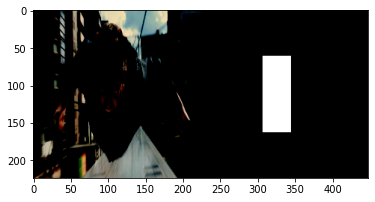

In [8]:
# showing a random image with the mask side by side
import matplotlib.pyplot as plt
rnd = np.random.randint(0,X.shape[0])
img = X[rnd]
msk = masks[rnd].squeeze()
msk = np.stack((msk,)*3, axis=-1)
plt.imshow( np.concatenate([img, msk], axis = 1))

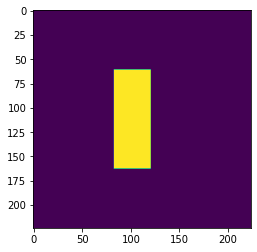

In [9]:
plt.imshow(masks[rnd]) # mask of the image

### Split the data into training and testing (2 marks)
- 400 images in training
- 9 images in testing data

Training data

In [10]:
X_train = X[:400] # 400 images will be part of the training
y_train = masks[:400] # 400 labels/masks as part of the training
print(X_train.shape)
print(y_train.shape)

(400, 224, 224, 3)
(400, 224, 224)


Testing data

In [11]:
X_test = X[400:] # 9 images will be part of the testing
y_test = masks[400:] # 9 masks will be part of the testing
print(X_test.shape)
print(y_test.shape)

(9, 224, 224, 3)
(9, 224, 224)


### Print a sample training image, image array and its mask (2 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


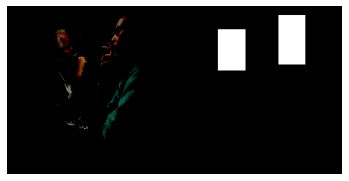

In [12]:
# priting the sample training image along with the mask side by side
plt.axis("off")
rnd = np.random.randint(0,X_train.shape[0])
img = X_train[rnd]
msk = y_train[rnd].squeeze()
msk = np.stack((msk,)*3, axis=-1)
plt.imshow( np.concatenate([img, msk], axis = 1))

In [13]:
print(X_train[rnd]) # Image Array

[[[-1.         -1.         -0.98431373]
  [-1.         -1.         -0.98431373]
  [-1.         -1.         -0.98431373]
  ...
  [-1.         -1.         -0.98431373]
  [-1.         -1.         -0.98431373]
  [-1.         -1.         -0.98431373]]

 [[-1.         -1.         -0.98431373]
  [-1.         -1.         -0.98431373]
  [-1.         -1.         -0.98431373]
  ...
  [-1.         -1.         -0.98431373]
  [-1.         -1.         -0.98431373]
  [-1.         -1.         -0.98431373]]

 [[-1.         -1.         -0.98431373]
  [-1.         -1.         -0.98431373]
  [-1.         -1.         -0.98431373]
  ...
  [-1.         -1.         -0.98431373]
  [-1.         -1.         -0.98431373]
  [-1.         -1.         -0.98431373]]

 ...

 [[-0.96862745 -0.96862745 -0.95294118]
  [-0.96862745 -0.96862745 -0.95294118]
  [-0.96862745 -0.96862745 -0.95294118]
  ...
  [-1.         -1.         -0.98431373]
  [-1.         -1.         -0.98431373]
  [-1.         -1.         -0.98431373]]

 [

Print the mask

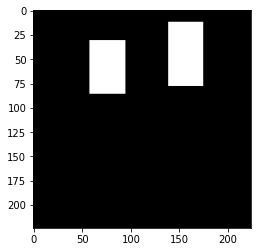

In [14]:
plt.imshow(msk) # mask

## Create the model (14 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [36]:
# reference: https://www.kaggle.com/hmendonca/u-net-model-with-submission
# https://www.kaggle.com/basu369victor/transferlearning-and-unet-to-segment-rocks-on-moon
# UNet-StyleV1.ipynb
# building the Mobilenet architecture in Unet style
# loading the required libraries
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, Input, UpSampling2D, Concatenate, Conv2D, Conv2DTranspose, MaxPooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

def create_model(trainable=True):
  tf.keras.backend.clear_session()
  model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")
  output_ = model.output # output of the encoder 7,7,1024
  for layer in model.layers:
    if layer.name in ['conv1_relu']:
      layer.trainable = True
  # Extracting the Encoder from the Mobilenet
  block1 = model.get_layer("conv_pw_1_relu").output # 112, 112, 64
  block2 = model.get_layer("conv_pw_2_relu").output # 56, 56, 128
  block3 = model.get_layer("conv_pw_4_relu").output # 28, 28, 256
  block4 = model.get_layer("conv_pw_6_relu").output # 14, 14, 512
  block5 = model.get_layer("conv_pw_13_relu").output # 7, 7, 1024
  # upsampling for the U-Net, custom layers
  x = Concatenate()([(output_), block5]) # 7,7,2048
  x = Concatenate()([UpSampling2D()(x), block4]) # 14,14,2560
  x = Concatenate()([UpSampling2D()(x), block3]) # 28,28,2816
  x = Concatenate()([UpSampling2D()(x), block2]) # 56,56,2944
  x = Concatenate()([UpSampling2D()(x), block1]) # 112,112,3008
  x = Conv2DTranspose(3,3,strides=(2,2), activation = 'relu', padding='same')(x) # 224, 224, 3
  x = Conv2D(1, kernel_size=1, activation="sigmoid")(x) # output layer
  x = Reshape((224,224))(x) # 224,224
  final_model = Model(inputs = [model.input], outputs = [x])
  return final_model

### Call the create_model function (4 mark)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [37]:
UNetmodel = create_model(trainable = False)

### Print model summary (2 mark)

In [38]:
#### Add your code here ####
UNetmodel.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
______________________________________________________________________________________________

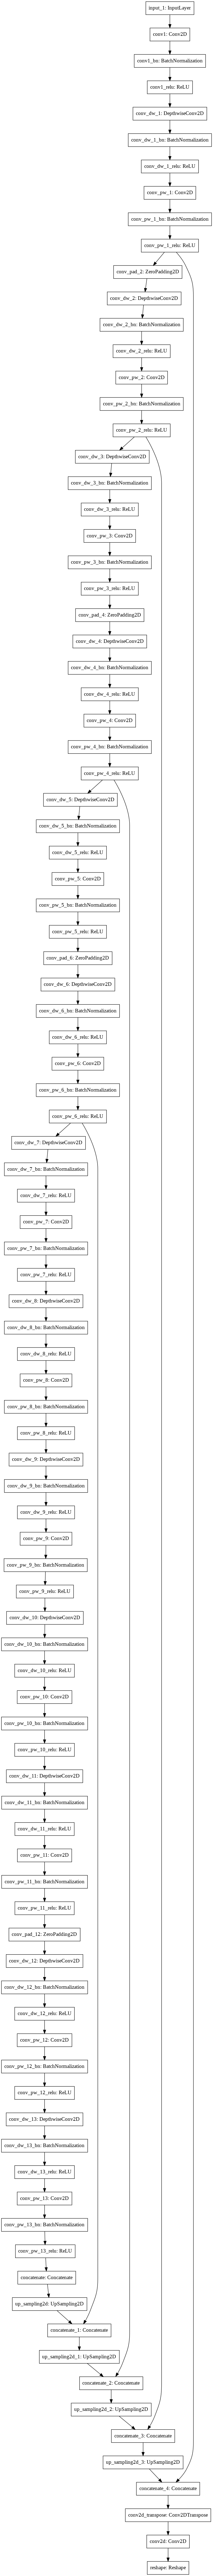

In [39]:
from tensorflow.keras.utils import plot_model
plot_model(UNetmodel)

### Define dice coefficient function (4 marks)
- Create a function to calculate dice coefficient


In [40]:
#### Add your code here ####
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss function (4 marks)

In [31]:
#### Add your code here ####
def loss_b(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.math.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

### Compile the model (4 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [41]:
#### Add your code here ####
optimizer = tf.keras.optimizers.Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
UNetmodel.compile(loss=loss_b, optimizer=optimizer, metrics=[dice_coefficient])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### Define callbacks (4 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [42]:
#### Add your code here ####
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
PATIENCE=5
checkpoint = tf.keras.callbacks.ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="auto", period=1)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=PATIENCE, mode="auto")
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="auto")

In [43]:
X_train[0], y_train[0]

(array([[[-0.57647061, -0.6156863 , -0.63921571],
         [-0.41960782, -0.4588235 , -0.48235291],
         [-0.54509807, -0.57647061, -0.60784316],
         ...,
         [-0.79607844, -0.71764708, -0.70980394],
         [-0.84313726, -0.7647059 , -0.7647059 ],
         [-0.80392158, -0.72549021, -0.71764708]],
 
        [[-0.60784316, -0.64705884, -0.67058825],
         [-0.4588235 , -0.49803919, -0.52156866],
         [-0.49803919, -0.53725493, -0.56078434],
         ...,
         [-0.8509804 , -0.81960785, -0.83529413],
         [-0.8509804 , -0.81176472, -0.83529413],
         [-0.75686276, -0.72549021, -0.74117649]],
 
        [[-0.60784316, -0.64705884, -0.67058825],
         [-0.51372552, -0.5529412 , -0.57647061],
         [-0.52941179, -0.56862748, -0.59215689],
         ...,
         [-0.77254903, -0.78823531, -0.82745099],
         [-0.7647059 , -0.78039217, -0.81960785],
         [-0.73333335, -0.74901962, -0.78823531]],
 
        ...,
 
        [[-0.50588238, -0.57647061

### Fit the model (5 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [44]:
#### Add your code here ####
history = UNetmodel.fit(X_train, 
                        y_train,
                        validation_data=(X_test,y_test), 
                        epochs = 20,
                        batch_size = 1, 
                        steps_per_epoch= X_train.shape[0]//1,
                        validation_steps = X_test.shape[0]//1,
                        use_multiprocessing = False,shuffle = True,
                        callbacks=[checkpoint,reduce_lr, stop])

Epoch 1/20
400/400 [==============================] - 10s 18ms/step - loss: 1.2803 - dice_coefficient: 0.4470 - val_loss: 1.2964 - val_dice_coefficient: 0.4452

Epoch 00001: val_loss improved from inf to 1.29640, saving model to model-1.30.h5
Epoch 2/20
400/400 [==============================] - 7s 17ms/step - loss: 0.8300 - dice_coefficient: 0.5983 - val_loss: 1.4213 - val_dice_coefficient: 0.4431

Epoch 00002: val_loss did not improve from 1.29640
Epoch 3/20
400/400 [==============================] - 7s 17ms/step - loss: 0.6779 - dice_coefficient: 0.6599 - val_loss: 1.2463 - val_dice_coefficient: 0.5017

Epoch 00003: val_loss improved from 1.29640 to 1.24631, saving model to model-1.25.h5
Epoch 4/20
400/400 [==============================] - 7s 17ms/step - loss: 0.6222 - dice_coefficient: 0.6835 - val_loss: 1.7175 - val_dice_coefficient: 0.4322

Epoch 00004: val_loss did not improve from 1.24631
Epoch 5/20
400/400 [==============================] - 6s 16ms/step - loss: 0.5529 - dice_

In [47]:
WEIGHTS_FILE = '/content/model-0.84.h5'
model = create_model(False)
model.load_weights(WEIGHTS_FILE)
for layer in model.layers[:7]:
  layer.trainable = True

In [48]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
______________________________________________________________________________________________

### Get the predicted mask for a test image   (5 marks)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


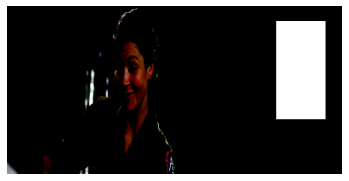

In [57]:
#### Add your code here ####
plt.axis("off")
rnd = np.random.randint(0,X_test.shape[0])
img = X_test[rnd]
msk = y_test[rnd].squeeze()
msk = np.stack((msk,)*3, axis=-1)
plt.imshow( np.concatenate([img, msk], axis = 1))

Show original mask for test image

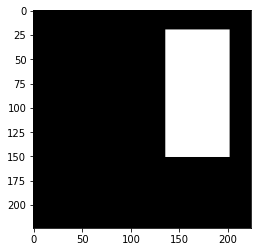

In [58]:
#### Add your code here ####
plt.imshow(msk)

Predict the mask on the test image

In [59]:
#### Add your code here ####
raw = X_test[rnd]
raw = raw[:,:,0:3] # resizing it to 3 channels
print(raw.shape)
# predict the mask
pred = model.predict(np.expand_dims(raw,0))

(224, 224, 3)


### Impose the mask on the test image (5 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


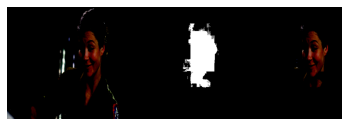

In [60]:
#mask post-processing
msk = pred.squeeze()
msk = np.stack((msk,)*3, axis = -1)
msk[msk >= 0.5] = 1
msk[msk < 0.5] = 0

# show the mask and segemented image side-by-side
combined = np.concatenate([raw,msk, raw*msk], axis =1)
plt.axis('off')
plt.imshow(combined)
plt.show()